In [1]:
dataset = ''
#dataset1 = dataset
from pathlib import Path
output_root = Path("result")
dirs = [fld for fld in output_root.glob(f'{dataset}-*')]

In [2]:
# Parameters
dataset = "rbp"


In [3]:
import pandas as pd
from lenskit import util
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from lenskit.datasets import MovieLens
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedKFold
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import LogisticRegressionCV
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.graphics.gofplots import qqplot
from scipy.stats import shapiro
from scipy.stats import friedmanchisquare, wilcoxon
from itertools import combinations
from lenskit import util
import warnings
warnings.filterwarnings('ignore')

In [4]:
output_root = Path("result")

In [5]:
dirs = [fld for fld in output_root.glob(f'{dataset}-*')]

In [6]:
dirs

[WindowsPath('result/rbp-ALS'),
 WindowsPath('result/rbp-Bias'),
 WindowsPath('result/rbp-IALS'),
 WindowsPath('result/rbp-IIE'),
 WindowsPath('result/rbp-III'),
 WindowsPath('result/rbp-Pop'),
 WindowsPath('result/rbp-UUE')]

In [7]:
pd.set_option('display.expand_frame_repr', False)
pd.set_option('display.width', 1000)

In [8]:
# Parameters
#dataset = "CAS"
#dataset = "rbp"
#dataset = "LOG"
#output_root = Path("result")
dataset

'rbp'

In [9]:
movies = pd.read_csv(r'C:\Users\srabantiguha\lk-demo-experiment\data\ml-20m\movies.csv')
movies = movies[['movieId','genres']]
movies = movies.join(movies.pop('genres').str.get_dummies('|'))
movies.rename({'movieId': 'item'}, axis=1, inplace=True)
movies

,item,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,...,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,0,0,1,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,4,0,0,0,0,0,1,0,0,1,...,0,0,0,0,0,1,0,0,0,0
4,5,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27273,131254,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27274,131256,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27275,131258,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27276,131260,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
dirs = [fld for fld in output_root.glob(f'{dataset}-*')]
dirs

[WindowsPath('result/rbp-ALS'),
 WindowsPath('result/rbp-Bias'),
 WindowsPath('result/rbp-IALS'),
 WindowsPath('result/rbp-IIE'),
 WindowsPath('result/rbp-III'),
 WindowsPath('result/rbp-Pop'),
 WindowsPath('result/rbp-UUE')]

In [11]:
def calc_new_col(row):
    
    if row <= a :
        return 'underexposed'
    
    elif row>= b:
        return 'overexposed'
    
    else:
        return 'Neutral'

Dataset:- result\rbp-ALS
count     1190.000000
mean        10.214318
std        851.393501
min      -1607.600134
25%        -31.387500
50%         -1.550000
75%         -0.387500
max      20242.093819
Name: difference, dtype: float64


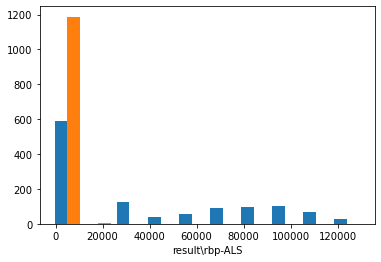

-----


Dataset:- result\rbp-Bias
count      476.000000
mean       470.372702
std       5252.131206
min      -1668.920499
25%        -74.496875
50%        -20.149996
75%         -4.940625
max      77762.587500
Name: difference, dtype: float64


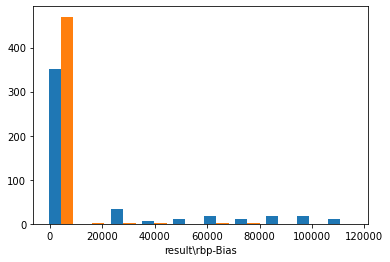

-----


Dataset:- result\rbp-IALS
count    7346.000000
mean        1.557280
std        54.427280
min      -395.023535
25%        -7.052349
50%        -3.091211
75%        -1.068400
max      1641.180406
Name: difference, dtype: float64


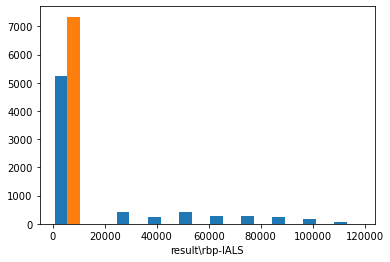

-----


Dataset:- result\rbp-IIE
count    9932.000000
mean      -15.279865
std       157.399936
min     -1668.831921
25%        -6.977589
50%        -1.002728
75%         0.002433
max      9281.396226
Name: difference, dtype: float64


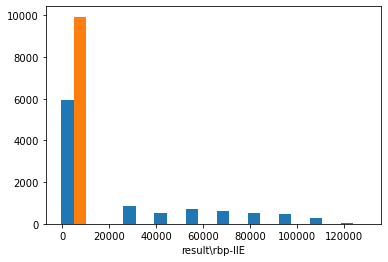

-----


Dataset:- result\rbp-III
count     3559.000000
mean         9.827269
std        727.376311
min      -1046.530449
25%        -57.405265
50%        -17.437500
75%         -5.425000
max      18883.492831
Name: difference, dtype: float64


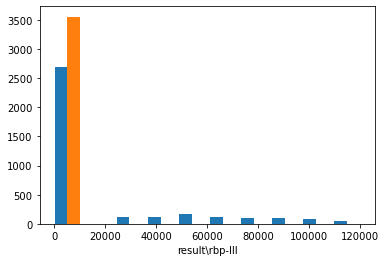

-----


Dataset:- result\rbp-Pop
count     1409.000000
mean        41.645271
std       2650.199235
min       -790.828905
25%       -167.399959
50%        -89.899999
75%        -49.584375
max      73821.037500
Name: difference, dtype: float64


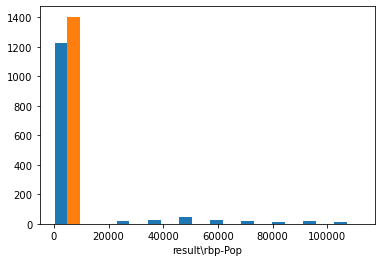

-----


Dataset:- result\rbp-UUE
count     771.000000
mean      -69.899963
std       307.721705
min     -1668.962490
25%       -40.687500
50%        -0.387500
75%        -0.387500
max      5696.184321
Name: difference, dtype: float64


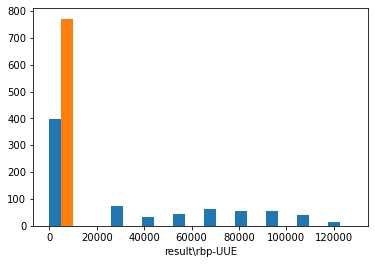

-----


In [12]:
analy = pd.DataFrame(columns = ["dataset","shape","Dist_EEL", "quantile(0.25)","quantile(0.75)","accuracy"], index= range(len(dirs)))

for p in range(len(dirs)): 
    
    print('Dataset:-',dirs[p])
    o = dirs[p]
    df = pd.read_csv(dirs[p], sep=',')
    #print(df.shape)

    df = df[['item','difference']]
#     print('Distribution of EEL')
    print(df['difference'].describe())
    
    plt.figure()
    plt.hist(df[np.isfinite(df['difference'])].values)
    plt.xlabel(dirs[p])
    plt.show()
    print('-----')

    a = df.difference.quantile(0.25) 
    b = df.difference.quantile(0.75) 
#     print("a and b")
#     print(a,b)

    df["category"] = df['difference'].apply(lambda x: calc_new_col(x))

    movies1 = movies.merge(df, on = 'item', how = 'inner')
    #print(movies1)
    map1 = {'underexposed':-1, 'overexposed':1, 'Neutral':0}
    movies1['category'] = movies1['category'].map(map1)
    movies1 = movies1.drop(columns=['item', 'difference'])

    X = movies1.drop(columns=['category'])
    y = movies1['category']
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75, random_state=42)
 

    
    elasticNet = LogisticRegressionCV(penalty='elasticnet', solver='saga',tol=0.01, l1_ratios =[0,0.1,0.2,0.3,0.4,0.5,0.6,0.8,0.9,1],random_state=0).fit(X_train, y_train)
   
    y_pred = elasticNet.predict(X_test)
    
    ac = (accuracy_score(y_test, y_pred))
    
    analy.iloc[p,0] = o
    analy.iloc[p,1] = (df.shape)
    analy.iloc[p,2] = 'Not showed'
    #analy.iloc[p,2] = df['difference'].describe()
    analy.iloc[p,3] = a
    analy.iloc[p,4] = b
    analy.iloc[p,5] = ac
    
analy1 = analy.T
analy1.columns = analy1.iloc[0]
analy1 =  analy1.drop(analy1.index[0])

In [13]:
analy1

dataset,result\rbp-ALS,result\rbp-Bias,result\rbp-IALS,result\rbp-IIE,result\rbp-III,result\rbp-Pop,result\rbp-UUE
shape,"(1190, 3)","(476, 3)","(7346, 3)","(9932, 3)","(3559, 3)","(1409, 3)","(771, 3)"
Dist_EEL,Not showed,Not showed,Not showed,Not showed,Not showed,Not showed,Not showed
quantile(0.25),-31.3875,-74.496875,-7.052349,-6.977589,-57.405265,-167.399959,-40.6875
quantile(0.75),-0.3875,-4.940625,-1.0684,0.002433,-5.425,-49.584375,-0.3875
accuracy,0.510067,0.478992,0.496462,0.509867,0.496629,0.507082,0.544041


In [14]:
ml20m = MovieLens(r'C:/Users/srabantiguha/lk-demo-experiment/data/ml-20m')
tag_genome = ml20m.tag_genome
tag_genome

tag,007,007 (series),18th century,1920s,1930s,1950s,1960s,1970s,1980s,19th century,...,world politics,world war i,world war ii,writer's life,writers,writing,wuxia,wwii,zombie,zombies
item,,,,,,,,,,,,,,,,,,,,,
1,0.02500,0.02500,0.05775,0.09675,0.14675,0.21700,0.06700,0.26275,0.26200,0.03200,...,0.03950,0.01800,0.04575,0.03275,0.12500,0.04150,0.01925,0.03625,0.07775,0.02300
2,0.03975,0.04375,0.03775,0.04800,0.11025,0.07250,0.04775,0.10975,0.09925,0.02050,...,0.04175,0.01925,0.01725,0.02425,0.12550,0.02250,0.01550,0.01475,0.09025,0.01875
3,0.04350,0.05475,0.02800,0.07700,0.05400,0.06850,0.05600,0.18500,0.04925,0.02675,...,0.04150,0.02675,0.02775,0.03425,0.15550,0.03675,0.01700,0.01950,0.09700,0.01850
4,0.03725,0.03950,0.03675,0.03100,0.06825,0.04050,0.02325,0.08700,0.05125,0.03025,...,0.05750,0.03375,0.02275,0.03975,0.18525,0.05925,0.01500,0.01525,0.06450,0.01300
5,0.04200,0.05275,0.05925,0.03675,0.07525,0.12525,0.02850,0.08500,0.02950,0.02875,...,0.04250,0.02825,0.02150,0.02600,0.14275,0.02075,0.01650,0.01675,0.10750,0.01825
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
130578,0.15400,0.04025,0.01975,0.01850,0.02850,0.02275,0.01000,0.03675,0.01025,0.01575,...,0.02875,0.01125,0.01250,0.02050,0.21000,0.02375,0.04225,0.00525,0.07575,0.01325
130840,0.02400,0.03025,0.02425,0.09375,0.05600,0.06025,0.02100,0.12900,0.11275,0.03650,...,0.02125,0.04250,0.01025,0.20350,0.47675,0.10775,0.06200,0.00775,0.27000,0.13375
131013,0.04200,0.03175,0.01700,0.05600,0.05750,0.02675,0.01600,0.04200,0.02800,0.03725,...,0.06675,0.01300,0.01275,0.02275,0.20000,0.10750,0.02500,0.00950,0.07550,0.01625


In [15]:
ind = tag_genome.index
ind1 = pd.DataFrame(ind.T, columns=['item'])

In [16]:
tag_genome1 = tag_genome.reset_index(level=[0], drop=True)

In [17]:
tag_genome1 = tag_genome1.iloc[:,1:]

In [18]:
tag_genome1 = pd.concat([ind1,tag_genome1], axis=1)

In [19]:
analyy = pd.DataFrame(columns = ["dataset","shape","Dist_EEL", "quantile(0.25)","quantile(0.75)","accuracy"], index= range(len(dirs)))


for p in range(len(dirs)): 
    
#     print('Dataset:-',dirs[p])
    o = dirs[p]
    df = pd.read_csv(dirs[p], sep=',')
    #print(df.head(2))

    df = df[['item','difference']]
#     print('Distribution of EEL')
#     print(df['difference'].describe())
#     print('-----')
 

    a = df.difference.quantile(0.25) 
    b = df.difference.quantile(0.75) 
#     print("a and b")
#     print(a,b)

    df["category"] = df['difference'].apply(lambda x: calc_new_col(x))


    movies1 = tag_genome1.merge(df, on = 'item', how = 'inner')
   # print(movies1)
    map1 = {'underexposed':-1, 'overexposed':1, 'Neutral':0}
    movies1['category'] = movies1['category'].map(map1)
    movies1 = movies1.drop(columns=['item', 'difference'])

    X = movies1.drop(columns=['category'])
    y = movies1['category']
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75, random_state=42)
 
    elasticNet = LogisticRegressionCV(penalty='elasticnet', solver='saga',tol=0.01, l1_ratios =[0,0.1,0.2,0.3,0.4,0.5,0.6,0.8,0.9,1],random_state=0).fit(X_train, y_train)
   
    y_pred = elasticNet.predict(X_test)

    #print(y_pred)

    ac = (accuracy_score(y_test, y_pred))
    
    analyy.iloc[p,0] = o
    analyy.iloc[p,1] = (df.shape)
    analyy.iloc[p,2] = 'Not showed'
    #analy.iloc[p,2] = df['difference'].describe()
    analyy.iloc[p,3] = a
    analyy.iloc[p,4] = b
    analyy.iloc[p,5] = ac
    
analy11 = analyy.T
analy11.columns = analy11.iloc[0]
analy11 =  analy11.drop(analy11.index[0])

In [20]:
analy11

dataset,result\rbp-ALS,result\rbp-Bias,result\rbp-IALS,result\rbp-IIE,result\rbp-III,result\rbp-Pop,result\rbp-UUE
shape,"(1190, 3)","(476, 3)","(7346, 3)","(9932, 3)","(3559, 3)","(1409, 3)","(771, 3)"
Dist_EEL,Not showed,Not showed,Not showed,Not showed,Not showed,Not showed,Not showed
quantile(0.25),-31.3875,-74.496875,-7.052349,-6.977589,-57.405265,-167.399959,-40.6875
quantile(0.75),-0.3875,-4.940625,-1.0684,0.002433,-5.425,-49.584375,-0.3875
accuracy,0.751295,0.571429,0.546358,0.71599,0.669346,0.514205,0.8
